# MAC0318 - Aprendizado Supervisionado - Notebook 1

*Pr√©-requisitos*: 
- **Software**: Para rodar este notebook corretamente, voc√™ deve ter o Python na vers√£o 3.9 ou mais recente e as bibliotecas NumPy e Tensorflow instaladas. Se voc√™ n√£o conseguir ou quiser instalar o Tensorflow em seu computador, √© poss√≠vel rod√°-lo na nuvem usando o [Google Colab](colab.research.google.com), como descrito na respectiva se√ß√£o abaixo. 
- **Conhecimento**: Esta atividade assume familiaridade com o uso de notebooks Jupyter, a manipula√ß√£o de matrizes usando a bilbioteca NumPy e conhecimento de derivadas parciais de fun√ß√µes multivariadas, al√©m de conceitos elementares de otimiza√ß√£o de fun√ß√µes. Recomendamos seguir algum tutorial da internet antes de realizar essa atividade, se esse n√£o for o seu caso.

<span style="color:blue">Se voc√™ est√° rodando o notebook em sala de aula, voc√™ deve ativar o ambiente `duckietown` do conda antes de abrir o jupyter notebook e escolher o kernel `duckietown`, para que os requerimentos sejam satisfeitos.</red>

In [79]:
# Vamos come√ßar carregando algumas bibliotecas necess√°rias

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Aprendizado supervisionado

Um **problema de aprendizado supervisionado** consiste de:

- Um conjunto de dados de entrada sa√≠da $\{(x_1,y_1),\ldots,(x_N,y_N)\}$.
- Uma classe de hip√≥teses $y=f(x) \in \mathcal{H}$; em geral assumimos que $y_i = f(x_i) + \epsilon$, onde $\epsilon$ √© um *ru√≠do*.
- Fun√ß√£o de avalia√ß√£o $J(f): \mathcal{H} \rightarrow \mathbb{R}$

Uma solu√ß√£o para o problema consiste de um **algoritmo de aprendizado** que recebe um conjunto de dados e a fun√ß√£o de avalia√ß√£o e devolve uma fun√ß√£o da classe de hip√≥teses.

## Regressor linear simples

Um dos problemas mais simples de aprendizado supervisionado √© o problema de regress√£o linear simples. Para esse problema temos

- Sa√≠da unidimensional $y_i \in \mathbb{R}$
- Classe de hip√≥tese de func√µes lineares $\mathcal{H} = \{ f(x) = b + w^t \cdot x  \mid b \in \mathbb{R}, w \in \mathbb{R}^{d} \}$
- Fun√ß√£o de avalia√ß√£o quadr√°tica $J(f) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(x_i))^2$

Vamos ver um exemplo muito simples de regress√£o linear simples, cujos dados de entrada $x_i$ s√£o unidimensionais.

### Dados de treino

Como de costume, vamos representar os dados de entrada por um vetor $x$ e os dados de sa√≠da por outro vetor $y$. Note que os vetores s√£o pareados no sentido de que o par de valores de mesma coordenada, como $x_i,y_i$, constituem um exemplo.

In [80]:
# Entrada
x = np.array([1, 2, 2.5, 3, 3.5, 4.5, 4.7, 5.2, 6.1, 6.1, 6.8])

# Sa√≠da
y = np.array([1.5, 1, 2, 2, 3.7, 3, 5, 4, 5.8, 5, 5.7])

# Tamanho do conjunto (quantidade de inst√¢ncias/exemplos)
N = len(x)

Vamos "ver" os dados

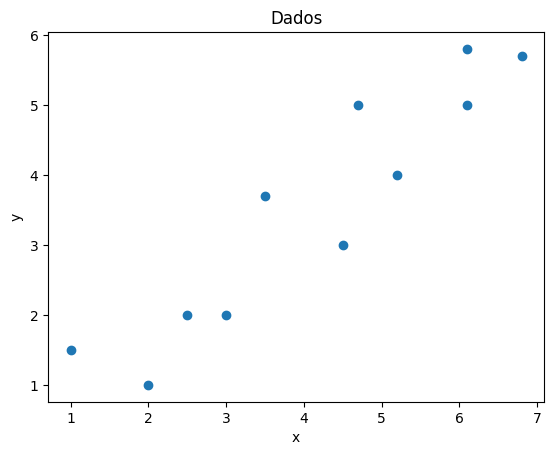

In [81]:
# Gr√°fico de dispers√£o
plt.scatter(x,y);
# T√≠tulo
plt.title("Dados");
# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");
# plt.savefig("dados.png") # Descomente se quiser salvar a imagem em formato PNG

### Classe de hip√≥teses

Vamos assumir a classe de fun√ß√µes lineares $f(x) = b + wx$, parametrizadas por valores reais $b$ e $w$.

O par√¢metro $b$ √© conhecido como vi√©s ou intercepto (*bias*) e o par√¢metro $w$ √© chamado de peso ou coeficiente de regress√£o (*slope*). 

In [82]:
H = lambda b,w: lambda x: b + w*x

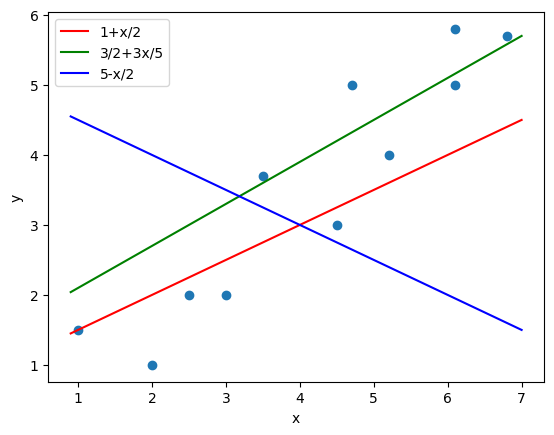

In [83]:
# Exemplos de hip√≥teses
f_ex1 = H(1,.5)   # 1 + 0.5x
f_ex2 = H(1.5,.6) # 1.5 + 0.6x
f_ex3 = H(5,-.5)  # 5 - 0.5x

# Dom√≠nio
X = np.linspace(0.9,7,2)

# Exibir fun√ß√£o
plt.plot(X,f_ex1(X),c="r",label="1+x/2")
plt.plot(X,f_ex2(X),c="g",label="3/2+3x/5")
plt.plot(X,f_ex3(X),c="b",label="5-x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Fun√ß√£o de avalia√ß√£o

A fun√ß√£o de avalia√ß√£o mais comum √© o erro quadr√°tico m√©dio, dado por
$$
J(x,y) = \frac{1}{N}\sum_{i=1}^N (y_i-f(x_i))^2
$$

In [84]:
J = lambda f: 0.5*np.sum((f(x)-y)**2)/N

In [85]:
J(f_ex1), J(f_ex2), J(f_ex3)

(np.float64(0.4915909090909091),
 np.float64(0.3948363636363636),
 np.float64(3.2997727272727273))

Vamos visualizar como curvas de n√≠vel a fun√ß√£o de avalia√ß√£o $J(b,x)$ parametrizada pelos valores de vi√©s e peso

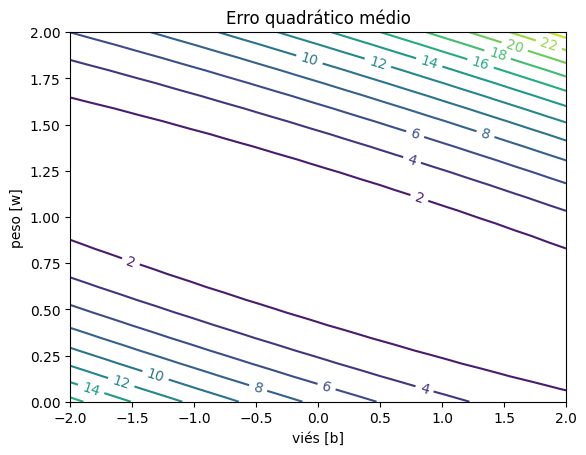

In [86]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espa√ßo param√©trico

V = np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        V[i,j] = J(H(B[i,j], W[i,j]))

fig, ax = plt.subplots();
CS = ax.contour(B, W, V, 15);
ax.clabel(CS, inline=True, fontsize=10);
ax.set_xlabel('vi√©s [b]');
ax.set_ylabel('peso [w]');
ax.set_title('Erro quadr√°tico m√©dio');
ax.set_title('Erro quadr√°tico m√©dio');


Vamos gerar algumas fun√ß√µes na classe de hip√≥tese e analis√°-las em rela√ß√£o ao custo

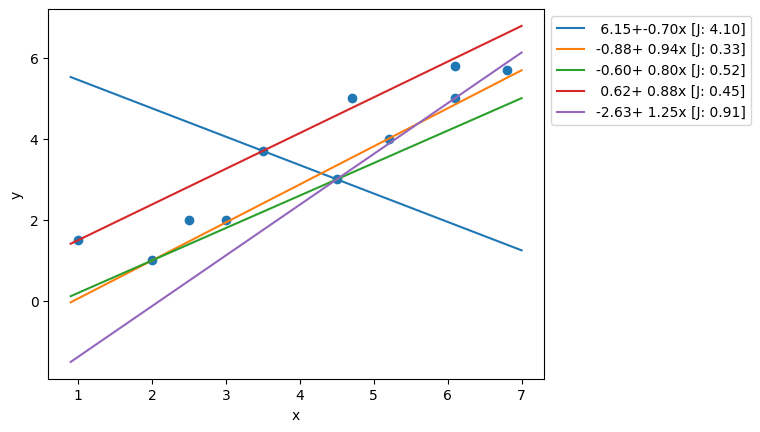

In [87]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

for _ in range(5):
    # Selecionamos dois pontos quaisquer de treino
    i = np.random.randint(0, N-1, 2)
    # E calculamos reta que passa por eles
    w = (y[i[0]] - y[i[1]])/(x[i[0]]-x[i[1]])
    b = y[i[0]] - w*x[i[0]]
    # Fun√ß√£o linear correspondente
    f = H(b,w)
    # Avalia√ß√£o
    loss = J(f)
    # Exibir no gr√°fico
    plt.plot(X,f(X),label=f"{float(b): 3.2f}+{float(w): 3.2f}x [J: {loss:.2f}]")

# Mostrar dados para compara√ß√£o
plt.scatter(x,y);
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

### Algoritmo de aprendizado

Um algoritmo de aprendizado recebe um conjunto de dados rotulados, $\{ (x_i,y_i) \}$ e escolhe uma fun√ß√£o dentro da classe de hip√≥teses de forma a minimizar uma fun√ß√£o de custo $J$. Um algoritmo simples mas muito efetivo para aprendizado em classes de hip√≥teses cont√≠nuas e sem restri√ß√µes √© o de descida do gradiente, que realiza uma busca gulosa de subida de encosta no espa√ßo de par√¢metros de modelos (hip√≥teses).

#### Descida do gradiente

Encontra m√≠nimo local de uma fun√ß√£o diferenci√°vel $J(w)$, parametrizada por vetor $w$, na vizinhan√ßa da solu√ß√£o inicial $w^{(0)}$ seguindo a cada passo a dire√ß√£o de maior "inclina√ß√£o", dada pelo gradiente $\nabla J(w)$:


&nbsp;&nbsp;&nbsp; 1: &nbsp; Escolha solu√ß√£o inicial $w^{(0)}$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>para</b> k = 0, 1, 2, ... <b>fa√ßa</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $g^{(k)}$ = $\nabla J(w^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; escolha $\eta_k$ que minimize $J(w^{(k)}-\eta_k g^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $w^{(k+1)} = w^{(k)} - \eta_k g^{(k)}$ <br>


Na pr√°tica o passo 4 √© realizado escolhendo $\eta_k$ atrav√©s de uma heur√≠stica.

### Gradiente de erro quadr√°tico m√©dio para fun√ß√£o linear

Para $f(x)=b+wx$ e $J(f)=\frac{1}{2N}\sum_i (f(x)-y_i)^2$. O gradiente de $J$ em rela√ß√£o aos par√¢metros √© dado por:

$$
\nabla J (b,w) = \begin{bmatrix} \frac{\partial J(b+wx)}{\partial b} \\ \frac{\partial J(b+wx)}{\partial w} \end{bmatrix} = \frac{1}{N} \begin{bmatrix} \sum_{i=1}^N (f(x_i)-y_i) \\ \sum_{i=1}^N (f(x_i)-y_i)x_i \end{bmatrix}
$$

In [88]:
# Fun√ß√£o de gradiente para hip√≥tese linear

grad_J = lambda b, w: np.array([np.sum(b+w*x-y), np.sum((b+w*x-y)*x)/N])

In [89]:
# Gradiente de f(x) = 1 + x/2

grad_J(1.0, 0.5)

array([-5.  , -3.02])

Vamos tentar visualizar o gradiente $\nabla J: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ como um mapa vetorial.

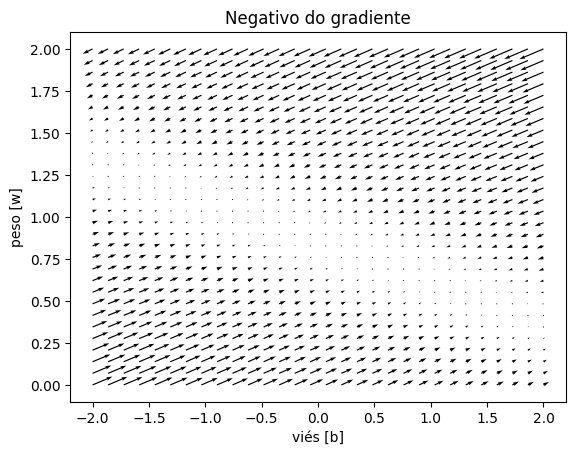

In [90]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espa√ßo param√©trico

U, V = np.zeros(B.shape), np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        g = grad_J(B[i,j], W[i,j])
        U[i,j] = -g[0]
        V[i,j] = -g[1]

plt.xlabel('vi√©s [b]')
plt.ylabel('peso [w]')
plt.title('Negativo do gradiente')

plt.quiver(B,W,U,V); 

### Otimiza√ß√£o

No caso da regress√£o linear simples com erro quadr√°tico m√©dio, existe apenas uma solu√ß√£o √≥tima (global), e o algoritmo de descida do gradiente converge para essa solu√ß√£o a partir de qualquer solu√ß√£o inicial, desde que a taxa de aprendizado $\eta_k$ seja pequena o suficiente.

Vamos encontrar a fun√ß√£o linear √≥tima para nosso exemplo por meio da descida do gradiente.

In [91]:
def learning_linear_regression(epochs, alpha):
    w = 10*np.random.rand(2) # inicializa√ß√£o arbitr√°ria dos par√¢metros

    k = epochs

    a = alpha # taxa de aprendizado (vamos usar um valor constante por simplicidade)


    g = grad_J(w[0],w[1])

    w_list, J_list = [w[:]], [J(H(w[0],w[1]))] # para exibir depois


    while np.linalg.norm(g) > 1e-3:
        w -= a*g
        g = grad_J(w[0],w[1])
        w_list.append(w[:])
        J_list.append(J(H(w[0],w[1])))
        k = k + 1
        if k >= 500: # no. m√°ximo de √©pocas
            break
    print("M√≠nimo local em:", w)
    print("Norma do gradiente:", np.linalg.norm(grad_J(w[0],w[1])))
    print("N√∫mero de √©pocas:", k)

    return w_list, J_list

Vamos inspecionar o progresso do aprendizado por √©poca desenhando as chamadas curvas de aprendizado, que exibem a qualidade do modelo estimado por √©poca (ou seja, por itera√ß√µes do algoritmo):

M√≠nimo local em: [-0.01304963  0.85582855]
Norma do gradiente: 0.011326859509317163
N√∫mero de √©pocas: 500


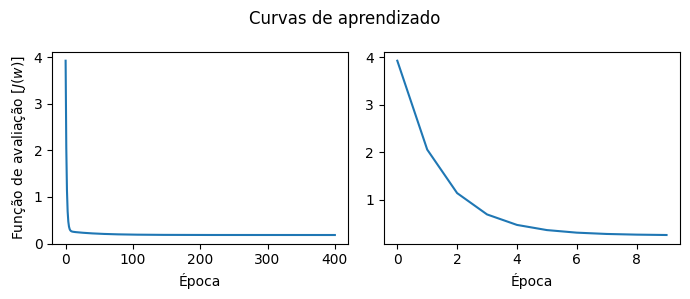

In [92]:
def plot_learning_curve(epochs, alpha):
    w, J_list = learning_linear_regression(epochs, alpha)
    fig, ax = plt.subplots(1,2,figsize=(7,3))
    # Esquerda: Para todas as √©pocas
    ax[0].plot(J_list);
    ax[0].set_ylabel('Fun√ß√£o de avalia√ß√£o [$J(w)$]')
    ax[0].set_xlabel('√âpoca')
    # Direita: Apenas para primeiras 10 √©pocas
    ax[1].plot(J_list[:10]);
    ax[1].set_xlabel('√âpoca')
    plt.suptitle('Curvas de aprendizado')
    plt.tight_layout()

plot_learning_curve(100, 0.01)

Como √© poss√≠vel observar, para esse exemplo muito simples e com a taxa de aprendizado $\alpha=0.01$, o algoritmo converge em poucas √©pocas para uma solu√ß√£o pr√≥xima √† √≥tima, por√©m leva um grande tempo at√© de fato convergir. Isso ocorre, pois ao se aproximar de um √≥timo local (ponto estacion√°rio) o gradiente se torna cada vez menor (norma pr√≥xima a zero) o que faz com que os passos de atualiza√ß√£o dos par√¢metros sejam cada vez menores. Existem t√©cnicas para _acelerar_ e mitigar tais efeitos, por√©m n√£o entraremos nesses detalhes aqui.

## üí° Exerc√≠cio 1

Modifique a taxa de aprendizado e rode o algoritmo de aprendizado novamente para investigar os efeitos. Em particular:

- Encontre uma taxa de aprendizado que fa√ßa o algoritmo divergir, ou seja, a fun√ß√£o de avalia√ß√£o aumenta ao inv√©s de diminuir com as √©pocas
- Encontre uma taxa de aprendizado que fa√ßa o algoritmo convergir t√£o lentamente que ele encontra um valor ruim ao atingir o n√∫mero m√°ximo de √©pocas (500)

M√≠nimo local em: [5.90194116e+121 2.47793598e+121]
Norma do gradiente: 1.9242261780323388e+123
N√∫mero de √©pocas: 500


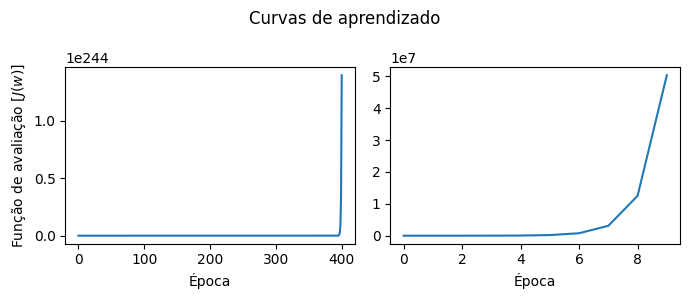

In [93]:
# Escreva aqui sua escolha que faz o algoritmo divergir (ilustre com curvas de aprendizado)
plot_learning_curve(100, 0.1)

M√≠nimo local em: [0.42580481 9.7193889 ]
Norma do gradiente: 445.7069294317875
N√∫mero de √©pocas: 501


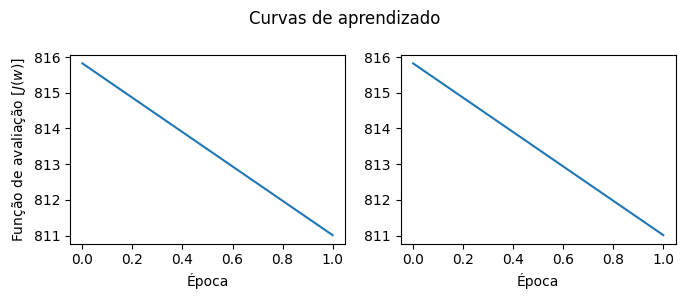

In [94]:
# Escreva aqui sua escolha que faz o algoritmo convergir muito lentamente
plot_learning_curve(500, 0.0001)

### Solu√ß√£o √≥tima

Para essa simples escolha de hip√≥tese e fun√ß√£o de avalia√ß√£o, podemos encontrar a solu√ß√£o √≥tima analiticamente (lembre-se que para esse caso h√° um √∫nico ponto de √≥timo global, que √© o ponto estacion√°rio):
$$
\nabla J(b,w) = 0 \Leftrightarrow \begin{cases} b N + w \sum_i x_i = \sum_i y_i \\ b \sum_i x_i + w\sum_i x_i^2 = \sum_i x_i y_i \end{cases} .
$$

Note que as equa√ß√µes acima representam um sistema de duas equa√ß√£o e duas inc√≥gnitas cujo determinante √© dado por

$$
 \det \begin{bmatrix} N & \sum_i x_i \\ \sum_i x_i & \sum_i x_i^2 \end{bmatrix} = N\sum_i x_i^2 - \left(\sum_i x_i\right)^2 \propto \hat{\mathrm{Var}}(X) ,
$$
onde $\hat{\mathrm{Var}}(X)$ denota a vari√¢ncia emp√≠rica da vari√°vel aleat√≥ria $X$. Portanto, o sistema possui solu√ß√£o sempre que a vari√°vel possuir vari√¢ncia positiva, ou seja, que os valores $x_i$ n√£o forem constantes. Embora o sistema acima possua [solu√ß√£o em forma fechada conhecida](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line), vamos resolv√™-lo numericamente.

In [95]:
# Matriz de coeficientes do sistema
A = np.array([[ N,       x.sum()      ],
              [ x.sum(), (x**2).sum() ]])
# Matrix de constantes
B = np.array([[ y.sum() ],[ (x*y).sum() ]])
# Solu√ß√£o
W = np.linalg.solve(A,B)

/var/folders/nt/34_c2fvj1hxfqfs3b1hmbdqh0000gq/T/ipykernel_86111/1223743297.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X,f(X),label=f"{float(W[0]): 3.2f}+{float(W[1]): 3.2f}x [J: {loss:.2f}]", color='r')


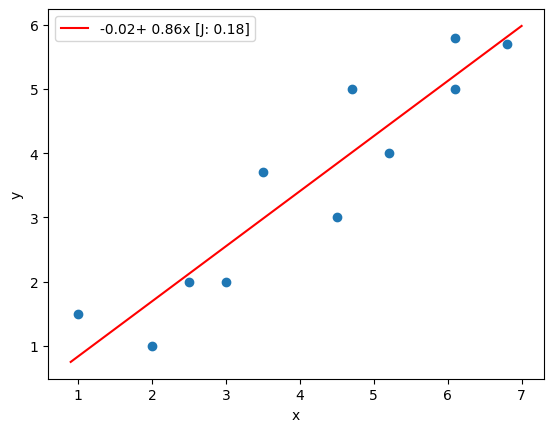

In [96]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

# Fun√ß√£o linear correspondente
f = H(W[0],W[1])
# Avalia√ß√£o
loss = J(f)
# Exibir no gr√°fico
plt.plot(X,f(X),label=f"{float(W[0]): 3.2f}+{float(W[1]): 3.2f}x [J: {loss:.2f}]", color='r')
plt.legend()
# Mostrar dados para compara√ß√£o
plt.scatter(x,y);

In [97]:
# Teste de otimalidade da solu√ß√£o: norma do gradiente para solu√ß√£o acima (deve ser virtualmente nula)

np.linalg.norm(grad_J(W[0],W[1]))

np.float64(4.3702415423881166e-15)

A solu√ß√£o acima √© t√£o pr√≥xima √† encontrada pelo m√©todo do gradiente quanto poss√≠vel numericamente. Isso n√£o √© coincidental: para o regressor linear simples com fun√ß√£o de avalia√ß√£o quadr√°tica, o problema de otimiza√ß√£o √© convexo, o que faz com que s√≥ exista um √≥timo local. Ademais, o algoritmo converge rapidamente para tal √≥timo, como discutimos antes. √â importante salientar que tais propriedades **n√£o se estendem para problemas mais complexos**, envolvedos fun√ß√µes n√£o-lineares e espa√ßos de otimiza√ß√£o n√£o convexos. Neles, **o m√©todo do gradiente pode n√£o convergir, e quando converge, pode obter uma solu√ß√£o sub√≥tima de baixa qualidade**.

## Regressor polinomial e regressor linear multivariado

Vamos repetir o exerc√≠cio assumindo agora uma classe de hip√≥teses mais expressiva:

$$
\mathcal{H} = \{ b + w_1 x + w_2 x^2 + w_3 x^3 | (b,w_1,w_2,w_3) \in \mathbb{R}^4 \}
$$

A classe de hip√≥teses acima √© equivalente a uma fun√ß√£o linear no **espa√ßo de atributos** $x' = (1,x,x^2,x^3)$. Para esse espa√ßo de entrada, a classe de hip√≥teses acima √© equivalente a $f(x)=\sum_{j=0} w_j x'_j$. As derivadas parciais s√£o portanto obtidas de maneira an√°loga ao regressor simples:

$$
\frac{\partial J(\sum_j w_jx')}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N (f(x_i')-y_i)x_i' 
$$

In [98]:
H2 = lambda w: lambda x: np.inner(w,x)

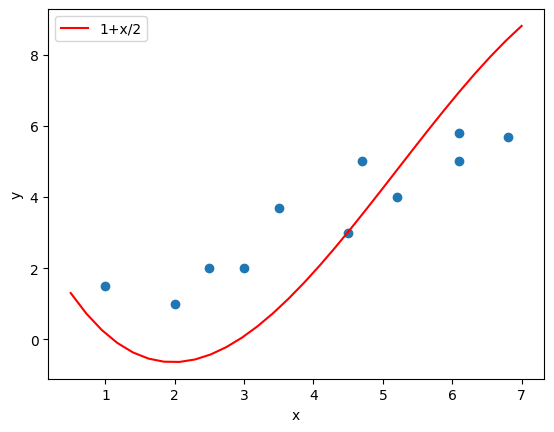

In [99]:
# Exemplo de hip√≥tese: 3 - 4x - 1.25x**2 - 0.08x**3
f_ex = H2(np.array([3,-4,1.25,-0.08])) # Note que o modelo agora possui 4 par√¢metros (entrada √© 4-dimensional)

# Espa√ßo de entrada original
X = np.linspace(0.5,7,30)

# Espa√ßo de entrada aumentado (espa√ßo de atributos)
Xp = np.array([np.ones(X.shape), X, X**2, X**3])

# Exibir fun√ß√£o
plt.plot(X, f_ex(Xp.T), c="r",label="1+x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Autodiferenciadores

Arcabou√ßos como [TensorFlow](https://www.tensorflow.org) e [PyTorch](https://pytorch.org) prov√™m diversas facilidades para realizar aprendizado de m√°quina de maneira eficiente. Uma das facilidades consiste em calcular o gradiente de maneira autom√°tica.

Vamos usar o TensorFlow para obter o gradiente do regressor polinomial. 

*Se voc√™ n√£o conseguir ou quiser instalar a biblioteca, voc√™ pode usar o [Google Colab](https://colab.research.google.com) para executar o restante desse notebook. Lembre-se de logar usando sua conta USP para ter acesso a mais recursos computacionais.*

In [100]:
# Primeiros importamos a biblioteca (pode levar alguns segundos)

import tensorflow as tf # se isso falhar, tente fechar o jupyter, ativar o ambiente (conda activate duckietown) e abr√≠-lo novamente; 
                        # se ainda assim n√£o conseguir, tente prosseguir usando o Google Colab como informado acima

In [101]:
# Vari√°veis s√£o usadas para declarar par√¢metros do modelo

#W = tf.Variable(np.random.randn(4), name="weights") # gera par√¢metros aleatoriamente
W = tf.Variable(np.array([3,-4,1.25,-0.08]), name="weights") # gera par√¢metros com valores iniciais dados

# Define o modelo: regressor linear multivariado
def linear_regression(x):
    return tf.tensordot(x, W, axes=1)

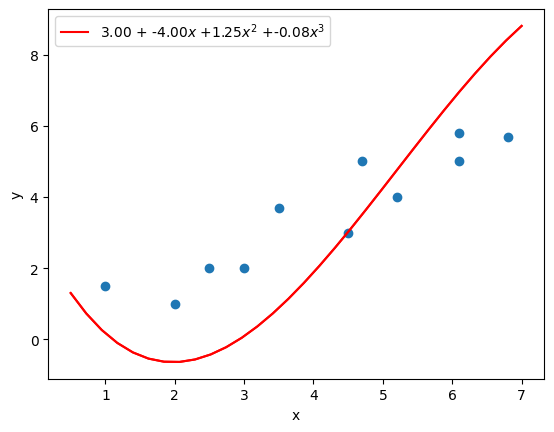

In [102]:
# Vamos usar o modelo inicial para predizer a sa√≠da
y_pred = linear_regression(Xp.T) 

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r');
w = W.numpy()
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

In [103]:
# Fun√ß√£o de avalia√ß√£o: Erro quadr√°tico m√©dio
def mean_square_error(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred-y_true)) / (2 * N)

Vamos calcular o custo dado pela fun√ß√£o de avalia√ß√£o para o modelo inicial

In [104]:
# Dados transformados para espa√ßo de atributos (espa√ßo de entrada aumentado)
xx = np.array([np.ones(x.size), x, x**2, x**3]).T

# Computa erro no conjunto de dados
custo = mean_square_error( linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 1.7031282758909063


Vamos otimizar os par√¢metros pelo m√©todo da descida do gradiente

In [105]:
# Hiperpar√¢metros - guiam a otimiza√ß√£o e s√£o em geral escolhidos por tentativa e erro

alpha = 0.00005 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados

√©pocas = 1000 # no. de √©pocas - precisamos de muitas √©pocas pois estamos usando um alpha pequeno (e nenhuma t√©cnica de acelera√ß√£o)

for k in range(√©pocas):
    
    with tf.GradientTape() as g: # prepara as vari√°veis a serem atualizadas (W, no nosso caso)

        # Calcula a sa√≠da de acordo com o modelo atual
        y_pred = linear_regression(xx)

        # Calcula o custo das predi√ß√µes
        custo = mean_square_error(y_pred, y)

        # Calcula o gradiente (vetor de derivadas parciais) do custo com rela√ß√£o aos par√¢metros do modelo
        gradientes = g.gradient(custo, [W])
        
        # Ajusta pesos de acordo com regra de descida do gradiente (gradiente * taxa de aprendizado)
        W.assign_sub(gradientes[0]*alpha)      
                
        # Exibe progresso a cada 50 √©pocas
        if k % 50 == 0:
            print(f"√âpoca: {k} \t Custo: {custo.numpy()}")
            
print(f"√âpoca: {k} \t Custo: {custo.numpy()}")

√âpoca: 0 	 Custo: 1.7031282758909063
√âpoca: 50 	 Custo: 1.3099166871335564
√âpoca: 100 	 Custo: 1.2325232618534763
√âpoca: 150 	 Custo: 1.161704046859576
√âpoca: 200 	 Custo: 1.0968987454071082
√âpoca: 250 	 Custo: 1.037594815110772
√âpoca: 300 	 Custo: 0.9833233978151042
√âpoca: 350 	 Custo: 0.9336555963641854
√âpoca: 400 	 Custo: 0.8881990687042705
√âpoca: 450 	 Custo: 0.8465949122728657
√âpoca: 500 	 Custo: 0.8085148139330186
√âpoca: 550 	 Custo: 0.7736584428202021
√âpoca: 600 	 Custo: 0.7417510653982974
√âpoca: 650 	 Custo: 0.7125413637855902
√âpoca: 700 	 Custo: 0.6857994400260427
√âpoca: 750 	 Custo: 0.6613149904575878
√âpoca: 800 	 Custo: 0.6388956356799843
√âpoca: 850 	 Custo: 0.6183653928604087
√âpoca: 900 	 Custo: 0.5995632782452728
√âpoca: 950 	 Custo: 0.5823420287806947
√âpoca: 999 	 Custo: 0.5668690773082861


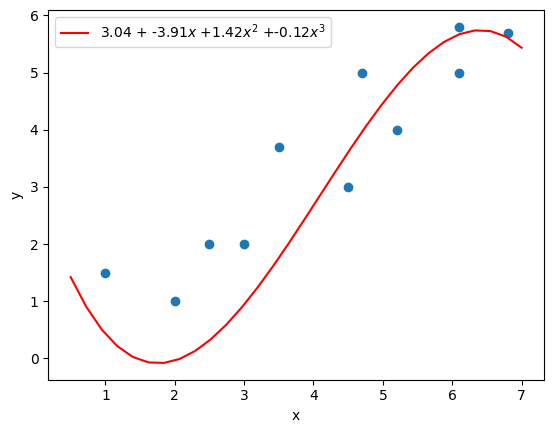

In [106]:
# Vamos usar o modelo aprendido para predizer a sa√≠da...
y_pred = linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W.numpy() # converte par√¢metros para tipo de vetor multidimentionadl do numpy
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

## Fun√ß√£o de ativa√ß√£o

Um dos problemas do regressor polinomial √© que sua sa√≠da cresce rapidamente. Vamos assumir que sabemos que a fun√ß√£o geradora dos dados nunca produz inst√¢ncias fora do intervalo $y \in [0,10]$, e portanto queremos *achatar* a sa√≠da do nosso modelo para que sua imagem se limite a tal intervalo. Uma maneira de condicionar a sa√≠da da fun√ß√£o mantendo-a diferenci√°vel √© usando uma *fun√ß√£o de ativa√ß√£o*, como por exemplo a fun√ß√£o log√≠stica:

$$
\mathrm{sigmoide}(x) = \frac{C}{1 + e^{a-bx}}
$$

cujos par√¢metros $C$, $a$ e $b$ ajustam a amplitude e a satura√ß√£o da fun√ß√£o

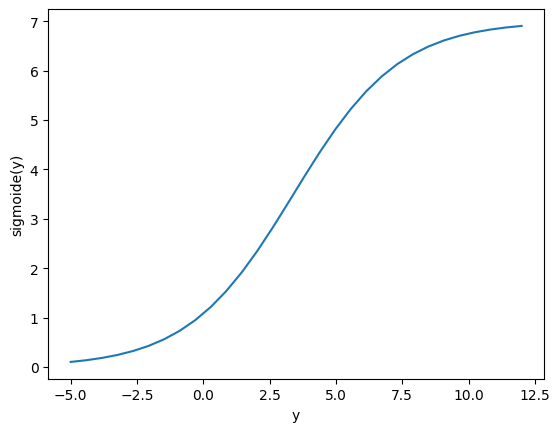

In [107]:
sigmoide = lambda x: 7/(1+np.exp(-0.5*x + 1.7))

y_sp = np.linspace(-5,12,30)

plt.plot(y_sp, sigmoide(y_sp));
plt.xlabel('y');
plt.ylabel('sigmoide(y)');

Vamos compor nosso regresso linear com a fun√ß√£o sigm√≥ide acima

In [108]:
W2 = tf.Variable(np.array([3,-4,1.25,-0.08])) # gera par√¢metros com valores iniciais dados
A = tf.Variable(np.array(1.5)) # gera par√¢metros com valores iniciais dados
B = tf.Variable(np.array(0.5)) # gera par√¢metros com valores iniciais dados
C = tf.Variable(np.array(7.0)) # gera par√¢metros com valores iniciais dados

# Define o novo modelo
def squashed_linear_regression(x):
    z = tf.tensordot(x, W2, axes=1)
    return C*tf.sigmoid(B*z-A) # equivalente a C/(1+tf.exp(A-B*z))    

Note que o resultado √© um fun√ß√£o n√£o-linear em rela√ß√£o aos par√¢metros, cujas derivadas n√£o s√£o t√£o simples de calcular. Por sorte, o TensorFlow pode calcul√°-las para n√≥s.

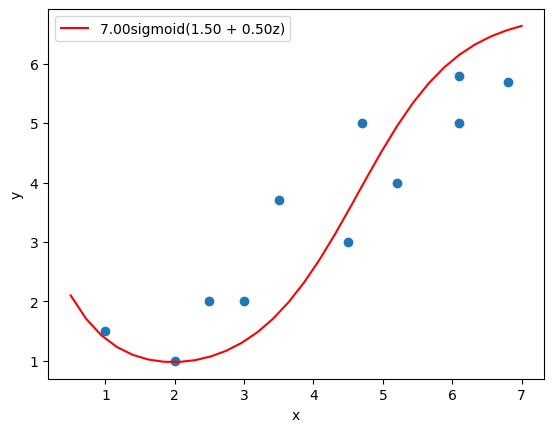

In [109]:
# Vamos usar o modelo inicial para predizer a sa√≠da
y_pred = squashed_linear_regression(Xp.T)

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sigmoid({float(A):.2f} + {float(B):.2f}z)');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

In [110]:
# Computa erro no conjunto de dados
custo = mean_square_error( squashed_linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 0.4282658758363505


In [111]:
# Vamos otimizar os par√¢metros

√©pocas = 1000 # no. de √©pocas

alpha = 0.0001 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados

for k in range(√©pocas):
    
    with tf.GradientTape() as g: # prepara as vari√°veis a serem atualizadas (W, no nosso caso)

        # Calcula a sa√≠da de acordo com o modelo atual
        y_pred = squashed_linear_regression(xx)

        # Calcula o custo das predi√ß√µes
        custo = mean_square_error(y_pred, y)

        # Calcula o gradiente
        gradientes = g.gradient(custo, [W2, A, B, C])
        
        # Atualiza pesos
        W2.assign_sub(gradientes[0]*alpha)      
        A.assign_sub(gradientes[1]*alpha)      
        B.assign_sub(gradientes[2]*alpha)      
        C.assign_sub(gradientes[3]*alpha)      

                
        # Progresso
        if k % 50 == 0:
            print(f"√âpoca: {k} \t Custo: {custo.numpy()}")
            
print(f"√âpoca: {k} \t Custo: {custo.numpy()}")

√âpoca: 0 	 Custo: 0.4282658758363505
√âpoca: 50 	 Custo: 0.38390892883100486
√âpoca: 100 	 Custo: 0.3725948175103206
√âpoca: 150 	 Custo: 0.3618369106708468
√âpoca: 200 	 Custo: 0.3516248494097216
√âpoca: 250 	 Custo: 0.3419469036454913
√âpoca: 300 	 Custo: 0.33279012199145386
√âpoca: 350 	 Custo: 0.32414046982670913
√âpoca: 400 	 Custo: 0.3159829592146482
√âpoca: 450 	 Custo: 0.3083017734534491
√âpoca: 500 	 Custo: 0.30108038821859806
√âpoca: 550 	 Custo: 0.29430169050525434
√âpoca: 600 	 Custo: 0.28794809592115217
√âpoca: 650 	 Custo: 0.2820016643336775
√âpoca: 700 	 Custo: 0.27644421344518216
√âpoca: 750 	 Custo: 0.27125742955904397
√âpoca: 800 	 Custo: 0.2664229746003545
√âpoca: 850 	 Custo: 0.2619225883595744
√âpoca: 900 	 Custo: 0.25773818492148437
√âpoca: 950 	 Custo: 0.25385194230989244
√âpoca: 999 	 Custo: 0.2503158560283081


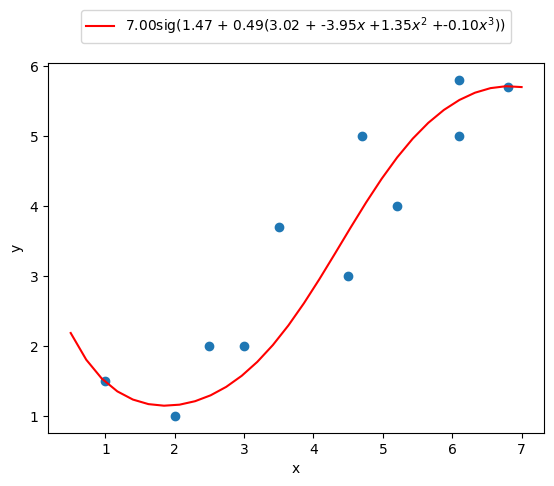

In [112]:
# Vamos usar o modelo aprendido para predizer a sa√≠da...
y_pred = squashed_linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W2.numpy()
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sig({float(A):.2f} + {float(B):.2f}({w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$))');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();
plt.legend(bbox_to_anchor=(.5,1.1), loc="center");

## üí° Exerc√≠cio 2

O algoritmo de descida do gradiente √© muito sens√≠vel √† escolha dos valores iniciais para os par√¢metros. Nos experimentos acima, n√≥s inciamos o algoritmo com valores relativamente pr√≥ximos do √≥timo. Na pr√°tica, raramente sabemos uma boa inicializa√ß√£o dos par√¢metros.

1. Modifique os valores para o n√∫mero de √©pocas e taxa de aprendizado para que o algoritmo obtenha um bom modelo quando iniciado com valores dos par√¢metros gerados aleatoriamente. Reflita sobre a converg√™ncia do algoritmo (n√∫mero de √©pocas necess√°rio para bom desempenho) e sensibilidade √† taxa de aprendizado quandos os par√¢metros s√£o incialiados aleatoriamente.

2. Execute o c√≥digo v√°rias vezes (portanto gerando diferentes inicializa√ß√µes aleat√≥rias dos par√¢metros) e repare em como o aprendizado √© afetado (custo ao t√©rmino do n√∫mero de √©pocas, taxa de aprendizado para converg√™ncia etc). Procure encontrar uma inicializa√ß√£o que leve a um desempenho muito insatisfat√≥rio e uma a um desempenho bom, quando os demais hiperpar√¢metros s√£o mantidos constantes (taxa de aprendizado, n√∫mero de √©pocas).

3. Investigue o uso de heur√≠stica para taxa de aprendizado mais sofisticadas. Uma sugest√£o √© usar uma fun√ß√£o decrescente como:

$$
\alpha = \frac{\alpha_0}{1+C*k}
$$

onde $\alpha_0 \in (0,1)$ √© uma constante de ganho, ajustada pelo valor da taxa de aprendizada na primeira √©poca, $k$ √© a √©poca e $C$ √© uma constante que regula o decaimento da taxa de aprendizado. Valores sugeridos s√£o $\alpha_0 = 0.1$ e $C=0.05$

### SUA RESPOSTA

<span style="color:red">Copie a c√©lula abaixo para responder aos itens 1 a 3 acima e escreva suas observa√ß√µes aqui</span>

In [113]:
def create_model_random_init(epochs, alpha, use_dynamic_lr=False):    
    """
    Treina o modelo com inicializa√ß√£o aleat√≥ria dos par√¢metros
    
    Args:
        epochs: n√∫mero de √©pocas de treinamento
        alpha: taxa de aprendizado inicial
        use_dynamic_lr: se True, usa taxa de aprendizado decrescente
    """
    W2 = tf.Variable(np.random.randn(4))  # pesos do regressor linear
    A = tf.Variable(np.random.randn(1))   # par√¢metro A da sigmoide  
    B = tf.Variable(np.random.randn(1))   # par√¢metro B da sigmoide
    C = tf.Variable(np.random.randn(1))   # par√¢metro C da sigmoide

    def alpha_dynamic(k, alpha_0=0.1, decay=0.05):
        """Taxa de aprendizado decrescente"""
        return alpha_0 / (1 + decay * k)

    print(f"Par√¢metros iniciais:")
    print(f"W2: {W2.numpy()}")
    print(f"A: {A.numpy()[0]:.3f}, B: {B.numpy()[0]:.3f}, C: {C.numpy()[0]:.3f}")
    print(f"Treinando por {epochs} √©pocas com alpha inicial = {alpha}")
    print("-" * 50)

    costs = []  # Para guardar hist√≥rico de custos
    
    for k in range(epochs):
        with tf.GradientTape() as g:
            # Predi√ß√µes usando modelo original (sigmoide composta)
            z = tf.tensordot(xx, W2, axes=1)
            y_pred = C * tf.sigmoid(B * z - A)
            
            # C√°lculo do custo
            custo = mean_square_error(y_pred, y)
            costs.append(custo.numpy())

            # C√°lculo do gradiente
            gradientes = g.gradient(custo, [W2, A, B, C])
            
            # Escolha da taxa de aprendizado
            current_alpha = alpha_dynamic(k, alpha) if use_dynamic_lr else alpha
            
            # Ajuste de pesos
            W2.assign_sub(gradientes[0] * current_alpha)      
            A.assign_sub(gradientes[1] * current_alpha)      
            B.assign_sub(gradientes[2] * current_alpha)      
            C.assign_sub(gradientes[3] * current_alpha)      
                    
            # Progresso
            if k % (epochs // 10) == 0 or k == epochs - 1:
                lr_str = f"(Œ±={current_alpha:.6f})" if use_dynamic_lr else f"(Œ±={alpha})"
                print(f"√âpoca: {k:4d} \t Custo: {custo.numpy():.6f} {lr_str}")
                
    return W2, A, B, C, costs

In [114]:
def plot_model_with_cost(epochs, alpha, use_dynamic_lr=False, seed=None):
    """
    Treina modelo e plota resultado com curva de custo
    """
    if seed is not None:
        np.random.seed(seed)  # Para reproducibilidade
        tf.random.set_seed(seed)
    
    # Treina o modelo
    W2, A, B, C, costs = create_model_random_init(epochs, alpha, use_dynamic_lr)
    
    # Predi√ß√µes para plotar
    z = tf.tensordot(Xp.T, W2, axes=1) 
    y_pred = C * tf.sigmoid(B * z - A)
    
    # Criar subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Dados e modelo aprendido
    ax1.scatter(x, y, label='Dados originais', alpha=0.7)
    w = W2.numpy()
    lr_type = "din√¢mica" if use_dynamic_lr else "fixa"
    final_cost = costs[-1]
    ax1.plot(X, y_pred, 'r', label=f'Modelo aprendido (custo final: {final_cost:.4f})\nTaxa: {lr_type}')
    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    ax1.legend()
    ax1.set_title(f'Resultado do modelo ({epochs} √©pocas, Œ±={alpha})')
    
    ax2.plot(costs, 'b-', alpha=0.7)
    ax2.set_ylabel('Custo (MSE)')
    ax2.set_xlabel('√âpoca')
    ax2.set_title('Curva de aprendizado')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return final_cost

√âpocas: 1000, Taxa: 0.001
Par√¢metros iniciais:
W2: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
A: -0.234, B: -0.234, C: 1.579
Treinando por 1000 √©pocas com alpha inicial = 0.001
--------------------------------------------------
√âpoca:    0 	 Custo: 7.473630 (Œ±=0.001)
√âpoca:  100 	 Custo: 7.470320 (Œ±=0.001)
√âpoca:  200 	 Custo: 7.465666 (Œ±=0.001)
√âpoca:  300 	 Custo: 7.457914 (Œ±=0.001)
√âpoca:  400 	 Custo: 7.438281 (Œ±=0.001)
√âpoca:  500 	 Custo: 3.090579 (Œ±=0.001)
√âpoca:  600 	 Custo: 2.762495 (Œ±=0.001)
√âpoca:  700 	 Custo: 2.491227 (Œ±=0.001)
√âpoca:  800 	 Custo: 2.266701 (Œ±=0.001)
√âpoca:  900 	 Custo: 2.080488 (Œ±=0.001)
√âpoca:  999 	 Custo: 1.926873 (Œ±=0.001)


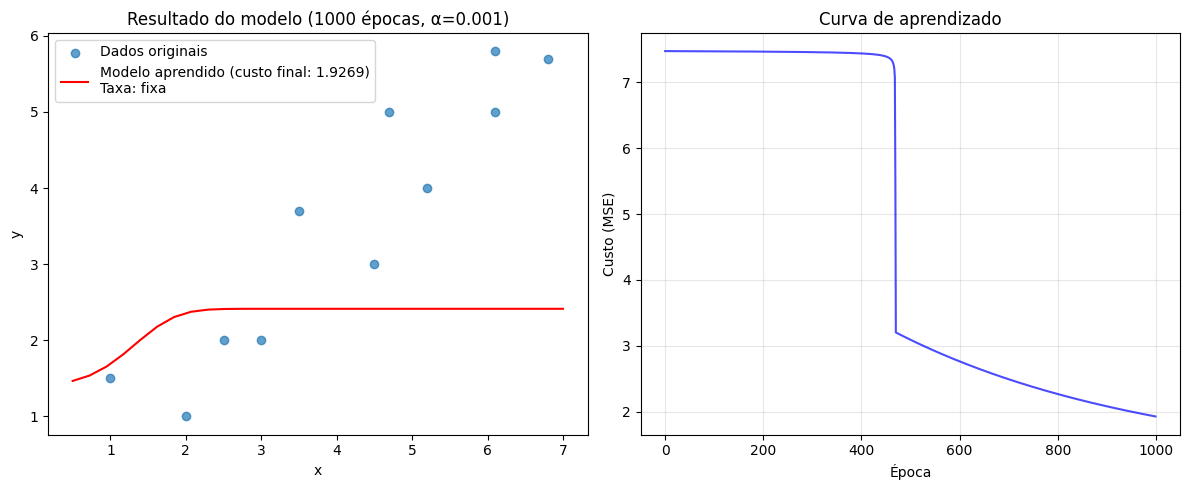

√âpocas: 1000, Taxa: 0.01
Par√¢metros iniciais:
W2: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
A: -0.234, B: -0.234, C: 1.579
Treinando por 1000 √©pocas com alpha inicial = 0.01
--------------------------------------------------
√âpoca:    0 	 Custo: 7.473630 (Œ±=0.01)
√âpoca:  100 	 Custo: 1.840870 (Œ±=0.01)
√âpoca:  200 	 Custo: 1.202569 (Œ±=0.01)
√âpoca:  300 	 Custo: 1.252305 (Œ±=0.01)
√âpoca:  400 	 Custo: 1.205072 (Œ±=0.01)
√âpoca:  500 	 Custo: 1.227163 (Œ±=0.01)
√âpoca:  600 	 Custo: 1.181014 (Œ±=0.01)
√âpoca:  700 	 Custo: 1.197972 (Œ±=0.01)
√âpoca:  800 	 Custo: 1.150723 (Œ±=0.01)
√âpoca:  900 	 Custo: 0.563771 (Œ±=0.01)
√âpoca:  999 	 Custo: 0.456445 (Œ±=0.01)


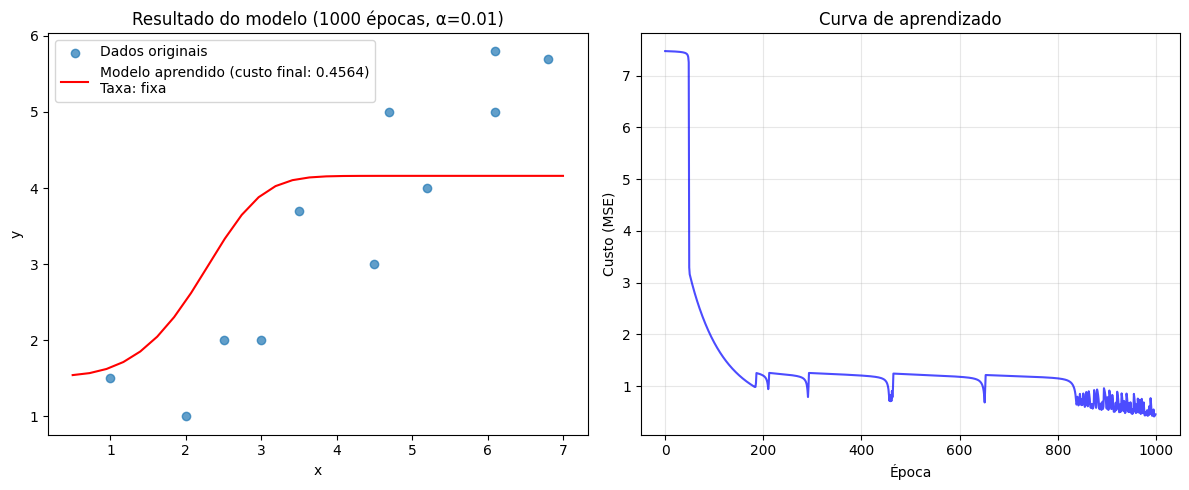

√âpocas: 1000, Taxa: 0.1
Par√¢metros iniciais:
W2: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
A: -0.234, B: -0.234, C: 1.579
Treinando por 1000 √©pocas com alpha inicial = 0.1
--------------------------------------------------
√âpoca:    0 	 Custo: 7.473630 (Œ±=0.1)
√âpoca:  100 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  200 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  300 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  400 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  500 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  600 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  700 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  800 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  900 	 Custo: 1.359824 (Œ±=0.1)
√âpoca:  999 	 Custo: 1.359823 (Œ±=0.1)


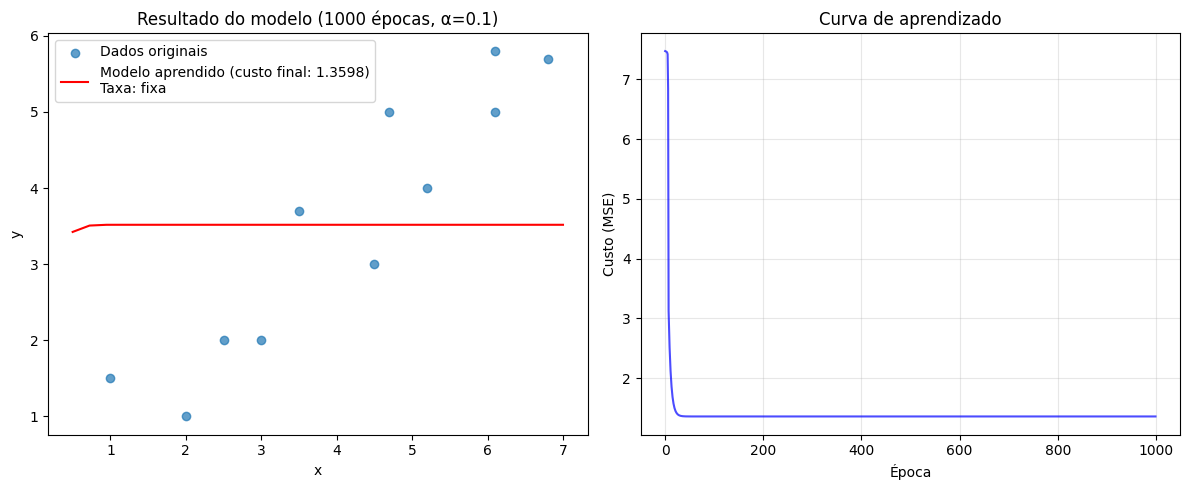

√âpocas: 5000, Taxa: 0.01
Par√¢metros iniciais:
W2: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
A: -0.234, B: -0.234, C: 1.579
Treinando por 5000 √©pocas com alpha inicial = 0.01
--------------------------------------------------
√âpoca:    0 	 Custo: 7.473630 (Œ±=0.01)
√âpoca:  500 	 Custo: 1.227163 (Œ±=0.01)
√âpoca: 1000 	 Custo: 0.713436 (Œ±=0.01)
√âpoca: 1500 	 Custo: 0.255978 (Œ±=0.01)
√âpoca: 2000 	 Custo: 0.203567 (Œ±=0.01)
√âpoca: 2500 	 Custo: 0.193323 (Œ±=0.01)
√âpoca: 3000 	 Custo: 0.189274 (Œ±=0.01)
√âpoca: 3500 	 Custo: 0.186448 (Œ±=0.01)
√âpoca: 4000 	 Custo: 0.183109 (Œ±=0.01)
√âpoca: 4500 	 Custo: 0.194878 (Œ±=0.01)
√âpoca: 4999 	 Custo: 0.182229 (Œ±=0.01)


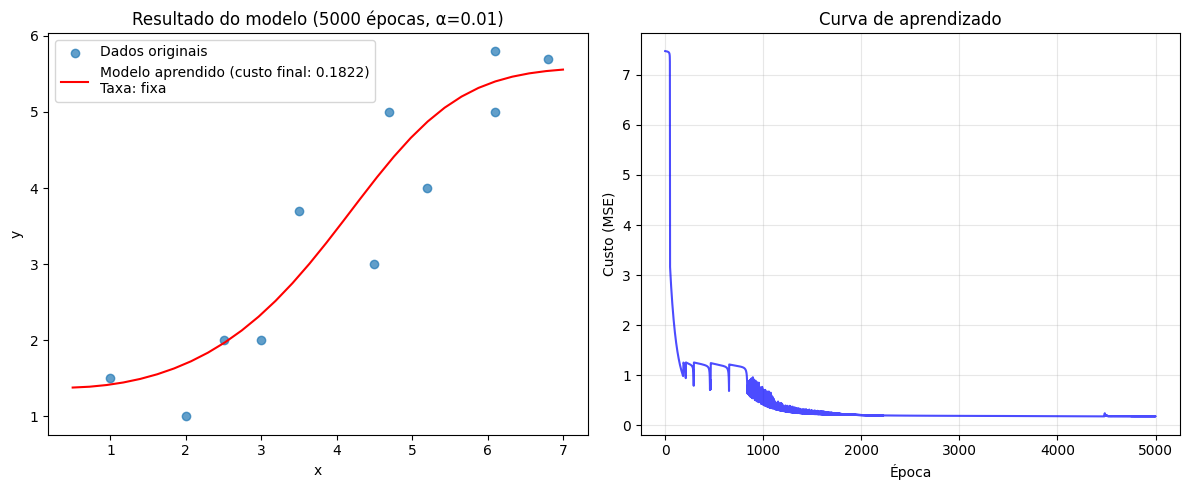

In [115]:
configs = [
    (1000, 0.001),
    (1000, 0.01), 
    (1000, 0.1),
    (5000, 0.01)
]

for epochs, alpha in configs:
    print(f"√âpocas: {epochs}, Taxa: {alpha}")
    cost = plot_model_with_cost(epochs, alpha, use_dynamic_lr=False, seed=42)

## Redes neurais

O modelo que constru√≠mos para a regressor polinomial (ou linear multivariado) com sa√≠da sigmoide exemplifica o conceito de unidade computacional em uma rede neural.

$$
\mathrm{neuronio}(x) = \sigma( w^t \cdot x + b ) \, ,
$$

onde $\sigma$ √© uma fun√ß√£o de ativa√ß√£o como a fun√ß√£o sigmoide, $w$ s√£o os pesos e $b$ √© o vi√©s ou constante. Note que $x$ e $w$ s√£o vetores em $\mathbb{R}^d$ para alguma dimens√£o $d$. Uma camada de uma rede neural √© composta por um conjunto de neur√¥nios, que compartilham da mesma entrada $x$, mas possuem par√¢metros $w$ e $b$ (possivelmente) distintos.

<figure style="text-align: center">
    <img src="img/neuronio.png" width=400>
</figure>

Especificar uma rede neural com v√°rios neur√¥nios por camada e v√°rias camadas √© uma tarefa laboriosa e sujeita a erros.
Por isso, o TensorFlow, assim como outros pacotes de aprendizado de m√°quina, possuem fun√ß√µes para facilitar e automatizar a cria√ß√£o de modelos complexos a partir da composi√ß√£o de fun√ß√µes pr√©-especificadas. A mais simples delas, chamada de *camada densa*, corresponde exatamente a um vetor de neur√¥nios como definido acima.

Vamos recriar o modelo anterior usando as facilidades de cria√ß√£o de modelos do TensorFlow, usando um subpacote chamado Keras.

In [116]:
# Primeiro criamos uma camada de entrada, para representar o vetor de entrada
entrada = tf.keras.Input(shape=(4,)) # dimens√£o 4 correspondente √† dimens√£o de nosso espa√ßo de atributos (1,x,x**2,x**3)

# Depois criamos a camada intermedi√°ria, que computa sigmoide(W*x + b), com x sendo a entrada
z = tf.keras.layers.Dense(1, activation=tf.sigmoid)(entrada) # camada densa com 1 neur√¥nio e fun√ß√£o de ativa√ß√£o log√≠stica

# Por fim, criamos a camada de sa√≠da, que no nosso caso √© apenas uma fun√ß√£o linear
sa√≠da = tf.keras.layers.Dense(1)(z) # camada densa com 1 neur√¥nio e fun√ß√£o de ativa√ß√£o linear

# O modelo encapsula a composi√ß√£o de fun√ß√µes e recorda as camadas de entrada e sa√≠da, necess√°rio para o aprendizado
modelo = tf.keras.Model(inputs=entrada, outputs=sa√≠da)

# Agora compilamos o modelo para produzir as derivadas com rela√ß√£o a 
# uma fun√ß√£o de avalia√ß√£o (loss) e um algoritmo de aprendizado 

alpha = 0.01 # taxa de aprendizado
# Vamos usar uma vers√£o ainda mais gulosa do algortimo de descida do gradiente, chamado de SGD (Stochastic Gradient Descent)
modelo.compile(
        optimizer=tf.keras.optimizers.SGD(alpha), # algoritmo de aprendizado (atualiza√ß√£o dos pesos)
        loss="mse" # fun√ß√£o de custo de valia√ß√£o - mse, mean squared error - usada para c√°lculo do gradiente
) 

In [117]:
# Otimizamos os par√¢metros com o m√©todo fit, que recebe o n√∫mero de √©pocas e a verbosidade
history = modelo.fit(xx,y, epochs=5000, verbose=0); # pode levar muitos segundos

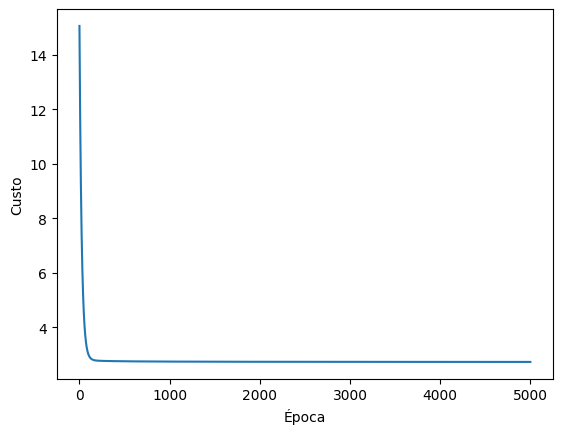

In [118]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('√âpoca');
plt.ylabel('Custo');

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step


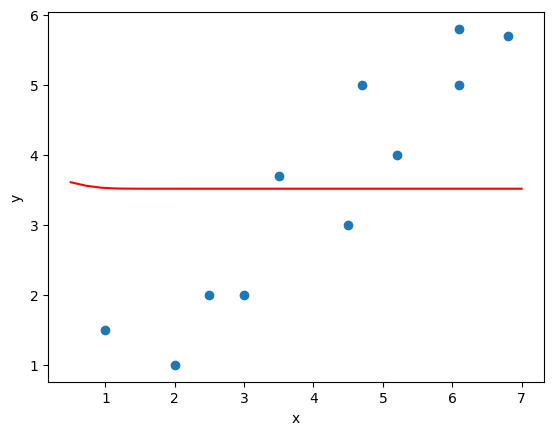

In [119]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo.predict(Xp.T)

# ...e visualizar o resultado

plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

Se a fun√ß√£o aprendida acima for muito ruim, voc√™ pode tentar executar a gera√ß√£o de um modelo aleat√≥rio e repetir a otimiza√ß√£o; como dito anteriormente, a otimiza√ß√£o por descida do gradiente √© muito afetada pela escolha inicial dos par√¢metros. Um valor razo√°vel de custo final para o modelo √© de < 0.5 ou pr√≥ximo disso.

### Uma rede mais complexa

Vamos agora construir uma rede neural mais complexa para prever os dados. A fun√ß√£o [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) facilita a composi√ß√£o de modelos de v√°rias camadas.

In [120]:
modelo2 = tf.keras.Sequential([
      tf.keras.Input(shape=(4,)), # camada de entrada
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
      tf.keras.layers.Dense(1) # Camada de sa√≠da
    ])

TensorFlow conta com [diversos otimizadores](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) al√©m de descida do gradiente. Os outros otimizadores diferem em como realizam a atualiza√ß√£o dos pesos e como usam a taxa de aprendizado, e s√£o em geral mais efetivos que o m√©todo de descida de gradiente padr√£o.

Vamos usar o otimimzador conhecido como Adam.

In [121]:
modelo2.compile(loss='mse', optimizer='Adam')

In [122]:
# Otimizamos os par√¢metros com o m√©todo fit - note o n√∫mero reduzido de √©pocas
history = modelo2.fit(xx,y, epochs=1000, verbose=0);

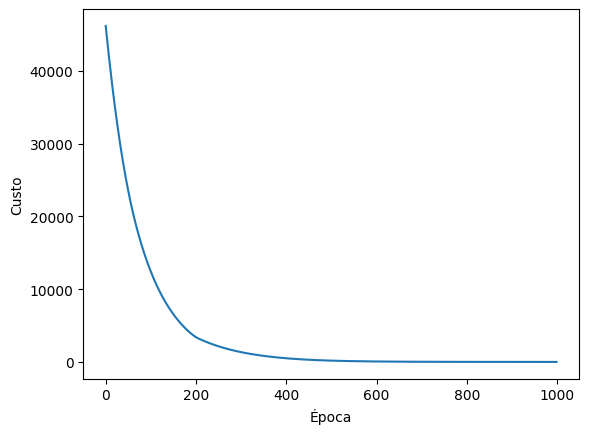

In [123]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('√âpoca');
plt.ylabel('Custo');

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step


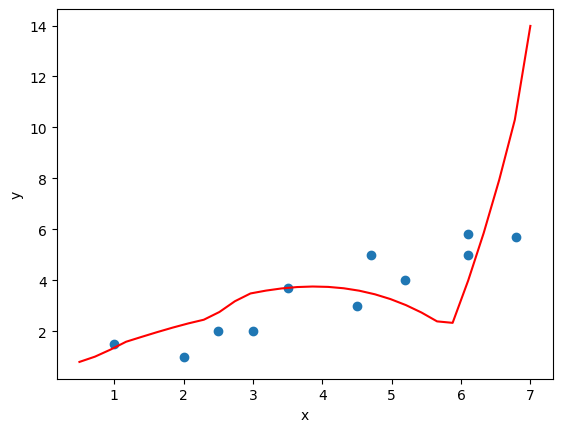

In [124]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo2.predict(Xp.T)


plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

O resultado do aprendizado com o algoritmo Adam √© em geral superior ao do m√©todo do gradiente (SGD); se a curva acima n√£o se ajusta razoalvemente aos dados, tente repetir o processo de gera√ß√£o de par√¢metros aleat√≥rios e otimiza√ß√£o dos par√¢metros acima.

## üí° Exerc√≠cio 3

Modifique o c√≥digo acima para investigar o efeito da escolha de arquitetura (n√∫mero de neur√¥nios por camada, n√∫mero de camadas, fun√ß√µes de ativa√ß√£o em cada camada) na fun√ß√£o aprendida. Responda as quest√µes abaixo, ilustrando com curvas de aprendizado e valores de custo de modelos aprendidos. Devido √† depend√™ncia da incializa√ß√£o do modelo na qualidade do modelo aprendido, √© comum obter estimativas de valores m√©dios sobre v√°rias repeti√ß√µes (experimentos) de gera√ß√£o de par√¢metros aleat√≥rios e otimiza√ß√£o.

1. Qual o efeito do aumento de complexidade da rede na fun√ß√£o obtida?
2. Qual o efeito do aumento de complexidade da rede no aprendizado (converg√™ncia)?

### SUA RESPOSTA

<span style="color:red">Escreva suas respostas nas c√©lulas abaixo</span>

In [139]:
def model_plot(layers, X, Xp_T, xx, x, y, epochs=1000, verbose=0):
    model = tf.keras.Sequential(layers)
    model.compile(loss='mse', optimizer='Adam')
    model.fit(xx, y, epochs=epochs, verbose=verbose)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(history.history['loss'])
    ax1.set_xlabel('√âpoca')
    ax1.set_ylabel('Custo')
    
    y_pred = model.predict(Xp_T)
    
    ax2.scatter(x, y)
    ax2.plot(X, y_pred, 'r')
    ax2.set_ylabel('y')
    ax2.set_xlabel('x')
    
    plt.tight_layout()
    return model


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step


<Sequential name=sequential_13, built=True>

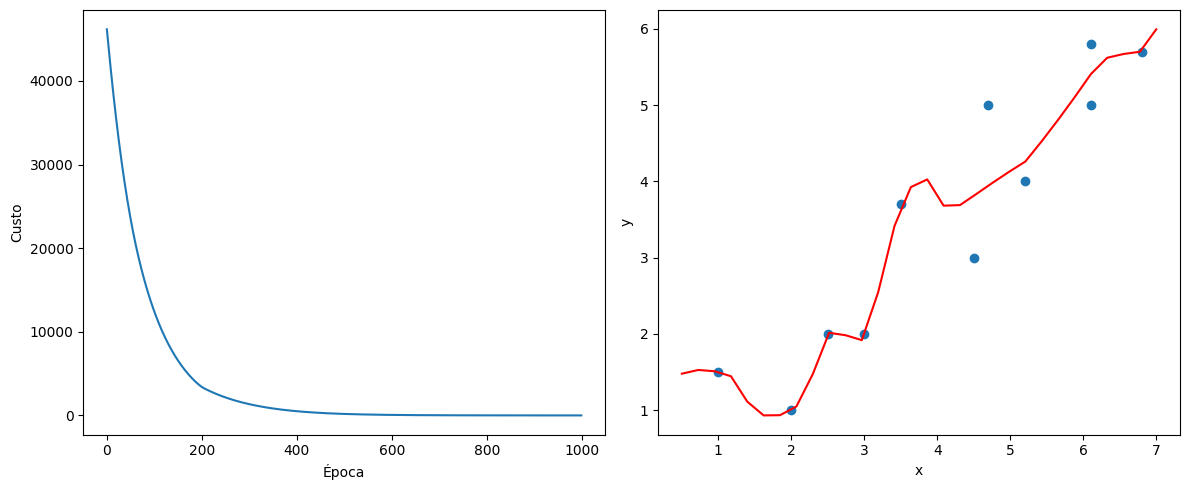

In [145]:
layers_1 = [
    tf.keras.Input(shape=(4,)), # camada de entrada
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(8, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(16, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(8, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(1) # Camada de sa√≠da
]
model_plot(layers_1, X, Xp.T, xx, x, y, epochs=5000, verbose=0)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step


<Sequential name=sequential_14, built=True>

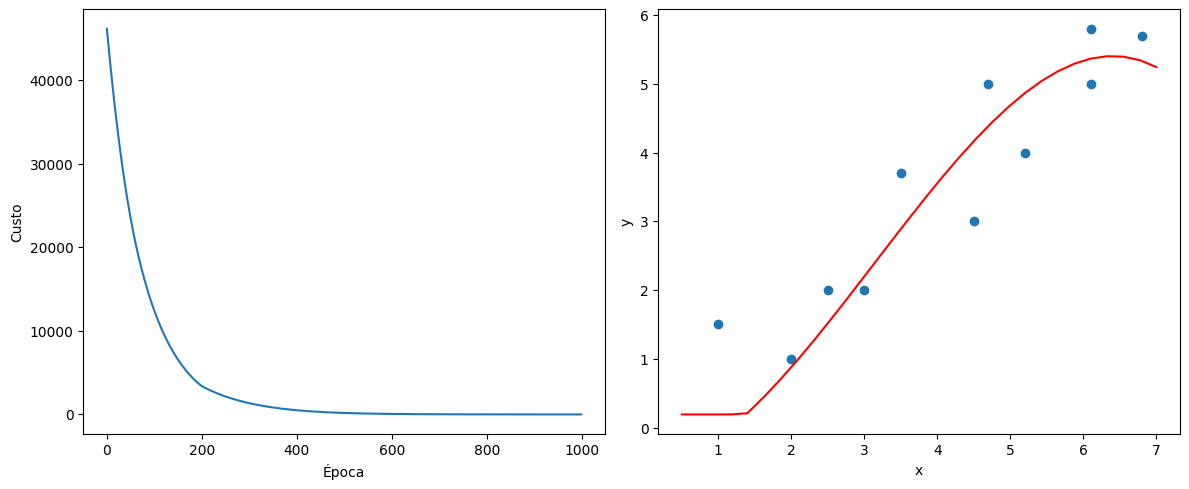

In [146]:
layers_2 = [
    tf.keras.Input(shape=(4,)), # camada de entrada
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(1) # Camada de sa√≠da
]
model_plot(layers_2, X, Xp.T, xx, x, y, epochs=5000, verbose=0)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step


<Sequential name=sequential_15, built=True>

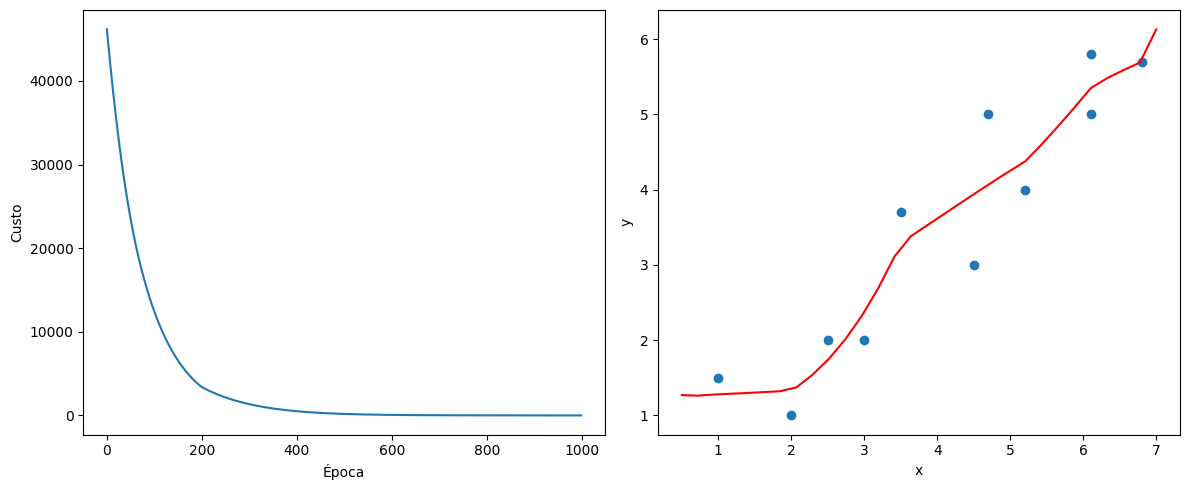

In [147]:
layers_3 = [
    tf.keras.Input(shape=(4,)), # camada de entrada
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
    tf.keras.layers.Dense(1) # Camada de sa√≠da
]
model_plot(layers_3, X, Xp.T, xx, x, y, epochs=5000, verbose=0)


‚Üí OBSERVA√á√ïES:

- Redes mais complexas podem ajustar melhor os dados (menor custo)
    - Mas podem sofrer de overfitting com poucos dados
- A capacidade de aproxima√ß√£o aumenta com mais neur√¥nios/camadas
- Redes mais complexas podem demorar mais para convergir
    - Mas o otimizador Adam ajuda na converg√™ncia
- Redes muito complexas podem ter problemas de gradientes
- O trade-off √© entre capacidade de modelagem e facilidade de treinamento